# Importing and loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

In [2]:
ds = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [3]:
ds.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

In [4]:
temp = ds["long_lat"].str.split(' ',n=1,expand=True)
ds["Long"] = temp[0]
ds["Lat"] = temp[1]
ds.drop(columns =["long_lat"], inplace = True)
ds.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

  txn_description                           merchant_id  merchant_code  \
0             POS  81c48296-73be-44a7-befa-d053f48ce7cd            NaN   
1       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e            NaN   
2             POS  835c231d-8cdf-4e96-859d-e9d571760cf0            NaN   
3       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673            NaN   
4       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0            NaN   

  first_name  balance  ... merchant_state                    extraction  \
0      Diana    35.39  ...            QLD  2018-08-01T01:01:15.000+0000   
1      Diana    21.20  ...            NSW  2018-08-01T01:13:45.000+0000   
2    Michael     5.71  ...            NSW  2018-08-01T01:26:15.000+0000   
3     Rhonda  2117.22  ...            QLD  2018-08-01T01:38:45.000+0000   
4      Diana    17.95  ...            QLD  2018-08-01T01:51:15.000+0000   

   amount                    transaction_id    country     customer_id  \
0   16.25  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
1   14.19  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2    6.42  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
3   40.90  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
4    3.25  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   

   merchant_long_lat movement    Long     Lat  
0      153.38 -27.99    debit  153.41  -27.95  
1      151.21 -33.87    debit  153.41  -27.95  
2      151.21 -33.87    debit  151.23  -33.94  
3      153.05 -26.68    debit  153.10  -27.66  
4      153.44 -28.06    debit  153.41  -27.95  

[5 rows x 24 columns]

In [5]:
ds[['Long', 'Lat']] = ds[['Long', 'Lat']].apply(pd.to_numeric)
ds.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

  txn_description                           merchant_id  merchant_code  \
0             POS  81c48296-73be-44a7-befa-d053f48ce7cd            NaN   
1       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e            NaN   
2             POS  835c231d-8cdf-4e96-859d-e9d571760cf0            NaN   
3       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673            NaN   
4       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0            NaN   

  first_name  balance  ... merchant_state                    extraction  \
0      Diana    35.39  ...            QLD  2018-08-01T01:01:15.000+0000   
1      Diana    21.20  ...            NSW  2018-08-01T01:13:45.000+0000   
2    Michael     5.71  ...            NSW  2018-08-01T01:26:15.000+0000   
3     Rhonda  2117.22  ...            QLD  2018-08-01T01:38:45.000+0000   
4      Diana    17.95  ...            QLD  2018-08-01T01:51:15.000+0000   

   amount                    transaction_id    country     customer_id  \
0   16.25  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
1   14.19  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2    6.42  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
3   40.90  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
4    3.25  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   

   merchant_long_lat movement    Long    Lat  
0      153.38 -27.99    debit  153.41 -27.95  
1      151.21 -33.87    debit  153.41 -27.95  
2      151.21 -33.87    debit  151.23 -33.94  
3      153.05 -26.68    debit  153.10 -27.66  
4      153.44 -28.06    debit  153.41 -27.95  

[5 rows x 24 columns]

### Conforming 100 unique customers in the dataset 

In [6]:
ds["account"].nunique()

100

In [7]:
ds["customer_id"].nunique()

100

___

# Checking and customizing the dataset

### Checking the transaction dates of each account

In [8]:
ds["date"].head()

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
Name: date, dtype: datetime64[ns]

### Dropping the extra coloumns and rearrenging the table

In [9]:
ds = ds[["status","first_name","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "txn_description","amount","customer_id","movement", "Long", "Lat"]]
ds["date"] = pd.to_datetime(ds["date"])
ds.head()

status first_name  card_present_flag  balance       date gender  age  \
0  authorized      Diana                1.0    35.39 2018-08-01      F   26   
1  authorized      Diana                0.0    21.20 2018-08-01      F   26   
2  authorized    Michael                1.0     5.71 2018-08-01      M   38   
3  authorized     Rhonda                1.0  2117.22 2018-08-01      F   40   
4  authorized      Diana                1.0    17.95 2018-08-01      F   26   

  merchant_suburb merchant_state txn_description  amount     customer_id  \
0         Ashmore            QLD             POS   16.25  CUS-2487424745   
1          Sydney            NSW       SALES-POS   14.19  CUS-2487424745   
2          Sydney            NSW             POS    6.42  CUS-2142601169   
3         Buderim            QLD       SALES-POS   40.90  CUS-1614226872   
4   Mermaid Beach            QLD       SALES-POS    3.25  CUS-2487424745   

  movement    Long    Lat  
0    debit  153.41 -27.95  
1    debit  153.41 -27.95  
2    debit  151.23 -33.94  
3    debit  153.10 -27.66  
4    debit  153.41 -27.95

In [10]:
df = ds[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "txn_description","amount","customer_id","movement", "Long", "Lat"]]
df["date"] = pd.to_datetime(df["date"])

/home/ankit79/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


___

# Exploring the data

### Total number of transactions made on daily basis 

In [11]:
ds["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

### Total number of transactions made by each customer

In [12]:
ds["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

___

# Calculating the monthly average transactions

## Average Volume and Average Transaction Amount of the customers

### Volume

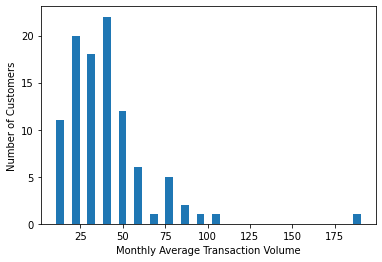

In [13]:
Vol = ds.amount.groupby(ds.customer_id)
Ave_Vol = Vol.count()/3

plt.hist(Ave_Vol, bins = 20, rwidth = 0.5)
plt.xlabel('Monthly Average Transaction Volume')
plt.ylabel('Number of Customers')
plt.show()

### Amount

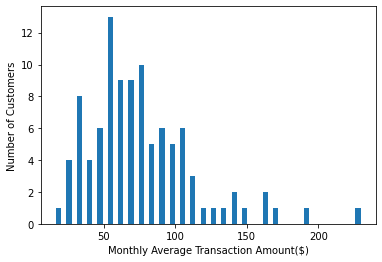

In [14]:
Ave_Amt = Vol.mean()/3

plt.hist(Ave_Amt, bins = 30, rwidth = 0.5)
plt.xlabel('Monthly Average Transaction Amount($)')
plt.ylabel('Number of Customers')
plt.show()

## Analysis by Date

In [15]:
def get_dm(date):
    return date.day

In [16]:
ds['dm']=ds['date'].map(get_dm)
ds.tail()

status first_name  card_present_flag   balance       date gender  \
12038  authorized    Melissa                0.0  14054.14 2018-10-31      F   
12039  authorized     Robert                1.0   9137.79 2018-10-31      M   
12040  authorized      Craig                1.0  45394.57 2018-10-31      M   
12041  authorized      Tyler                1.0  11350.67 2018-10-31      M   
12042  authorized       Ryan                1.0   5517.91 2018-10-31      M   

       age merchant_suburb merchant_state txn_description  amount  \
12038   30        Ringwood            VIC             POS    9.79   
12039   20          Casula            NSW       SALES-POS   63.87   
12040   28      Kings Park            NSW             POS   43.96   
12041   69        Oakleigh            VIC       SALES-POS   30.77   
12042   31          Mascot            NSW       SALES-POS   22.36   

          customer_id movement    Long    Lat  dm  
12038    CUS-55310383    debit  149.83 -29.47  31  
12039  CUS-2688605418    debit  151.22 -33.87  31  
12040  CUS-2663907001    debit  151.12 -33.89  31  
12041  CUS-1388323263    debit  144.96 -37.76  31  
12042  CUS-3129499595    debit  150.92 -33.77  31

Text(0.5, 1.0, 'No.of Transactions by month')

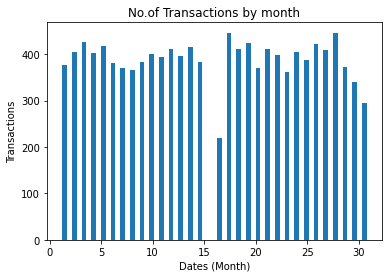

In [54]:
plt.hist(ds.dm, bins = 32, rwidth = 0.5)
plt.xlabel('Dates (Month)')
plt.ylabel('Transactions')
plt.title('No.of Transactions by month')

In [18]:
months = []
for date in ds["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

ds["Months"] = months
ds["Months"]

0         August
1         August
2         August
3         August
4         August
          ...   
12038    October
12039    October
12040    October
12041    October
12042    October
Name: Months, Length: 12043, dtype: object

## Analysis by days of the month

In [19]:
def get_weekday(date):
    return date.weekday()

In [20]:
ds['weekday']=ds['date'].map(get_weekday)
ds.tail()

status first_name  card_present_flag   balance       date gender  \
12038  authorized    Melissa                0.0  14054.14 2018-10-31      F   
12039  authorized     Robert                1.0   9137.79 2018-10-31      M   
12040  authorized      Craig                1.0  45394.57 2018-10-31      M   
12041  authorized      Tyler                1.0  11350.67 2018-10-31      M   
12042  authorized       Ryan                1.0   5517.91 2018-10-31      M   

       age merchant_suburb merchant_state txn_description  amount  \
12038   30        Ringwood            VIC             POS    9.79   
12039   20          Casula            NSW       SALES-POS   63.87   
12040   28      Kings Park            NSW             POS   43.96   
12041   69        Oakleigh            VIC       SALES-POS   30.77   
12042   31          Mascot            NSW       SALES-POS   22.36   

          customer_id movement    Long    Lat  dm   Months  weekday  
12038    CUS-55310383    debit  149.83 -29.47  31  October        2  
12039  CUS-2688605418    debit  151.22 -33.87  31  October        2  
12040  CUS-2663907001    debit  151.12 -33.89  31  October        2  
12041  CUS-1388323263    debit  144.96 -37.76  31  October        2  
12042  CUS-3129499595    debit  150.92 -33.77  31  October        2

Text(0.5, 1.0, 'No.of Transactions by days')

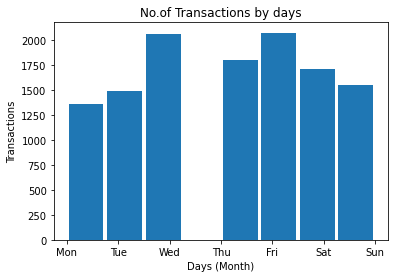

In [67]:
plt.hist(ds.weekday, bins = 8, rwidth = 0.9)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Days (Month)')
plt.ylabel('Transactions')
plt.title('No.of Transactions by days')

## Mean customer balance and payment amount by age

In [22]:
ds_cus_aug = ds[ds["Months"] == "August"].groupby("customer_id").mean()
ds_gen_aug = ds[ds["Months"] == "August"].groupby("gender").mean()

In [23]:
mean_f_bal_aug = ds_gen_aug["balance"].iloc[0]
mean_m_bal_aug = ds_gen_aug["balance"].iloc[1]
n_points = len(ds_cus_aug["age"])

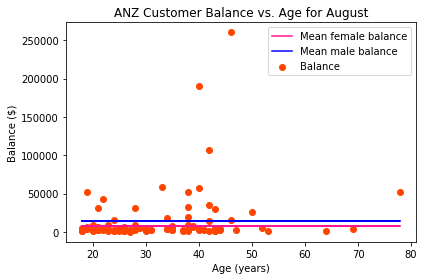

In [24]:
plt.figure()
plt.scatter(ds_cus_aug["age"], ds_cus_aug["balance"], c="#FF4500", label="Balance")
plt.plot(ds_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="#FF1493", label = "Mean female balance")
plt.plot(ds_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [25]:
mean_f_amt_aug = ds_gen_aug["amount"].iloc[0]
mean_m_amt_aug = ds_gen_aug["amount"].iloc[1]

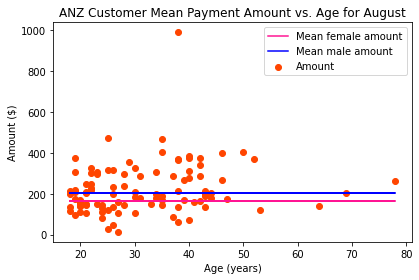

In [26]:
plt.scatter(ds_cus_aug["age"], ds_cus_aug["amount"], c="#FF4500", label="Amount")
plt.plot(ds_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c="#FF1493", label = "Mean female amount")
plt.plot(ds_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [27]:
ds_cus_sep = ds[ds["Months"]=="September"].groupby("customer_id").mean()
ds_gen_sep = ds[ds["Months"]=="September"].groupby("gender").mean()

In [28]:
mean_f_bal_sep = ds_gen_sep["balance"].iloc[0]
mean_m_bal_sep = ds_gen_sep["balance"].iloc[1]
n_points = len(ds_cus_sep["age"])

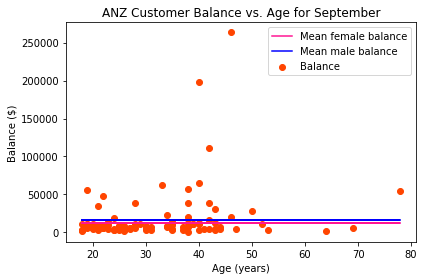

In [29]:
plt.figure()
plt.scatter(ds_cus_sep["age"], ds_cus_sep["balance"], c="#FF4500", label="Balance")
plt.plot(ds_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="#FF1493", label = "Mean female balance")
plt.plot(ds_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [30]:
mean_f_amt_sep = ds_gen_sep["amount"].iloc[0]
mean_m_amt_sep = ds_gen_sep["amount"].iloc[1]

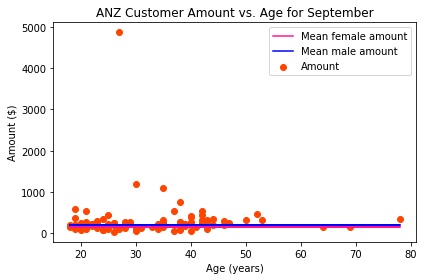

In [31]:
plt.figure()
plt.scatter(ds_cus_sep["age"], ds_cus_sep["amount"], c="#FF4500", label="Amount")
plt.plot(ds_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points), c="#FF1493", label = "Mean female amount")
plt.plot(ds_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [32]:
ds_cus_oct = ds[ds["Months"] == "October"].groupby("customer_id").mean()
ds_gen_oct = ds[ds["Months"] == "October"].groupby("gender").mean()

In [33]:
mean_f_bal_oct = ds_gen_oct["balance"].iloc[0]
mean_m_bal_oct = ds_gen_oct["balance"].iloc[1]
n_points = len(ds_cus_oct["age"])

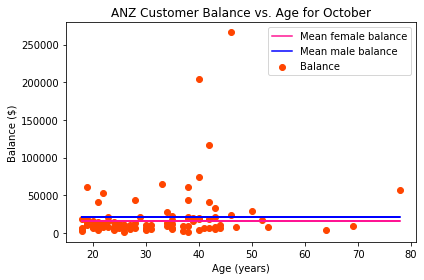

In [34]:
plt.figure()
plt.scatter(ds_cus_oct["age"], ds_cus_oct["balance"], c="#FF4500", label="Balance")
plt.plot(ds_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="#FF1493", label = "Mean female balance")
plt.plot(ds_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [35]:
mean_f_amt_oct = ds_gen_oct["amount"].iloc[0]
mean_m_amt_oct = ds_gen_oct["amount"].iloc[1]

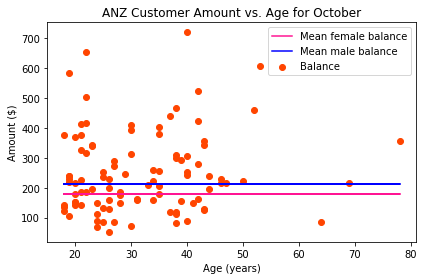

In [36]:
plt.figure()
plt.scatter(ds_cus_oct["age"], ds_cus_oct["amount"], c="#FF4500", label="Balance")
plt.plot(ds_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points), c="#FF1493", label = "Mean female balance")
plt.plot(ds_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

## Final mean amount and balance for the three months

In [37]:
ds_aug = ds[(ds['date'] >= '2018-08-01') & (ds['date'] < '2018-09-01')]
print("The final mean amount for August month is",ds_aug['amount'].mean())
print("The final mean balance for August month is",ds_aug['balance'].mean())

The final mean amount for August month is 185.12186659903628
The final mean balance for August month is 10794.148620339842


In [38]:
ds_sep = ds[(ds['date'] >= '2018-09-01') & (ds['date'] < '2018-10-01')]
print("The final mean amount for September month is",ds_sep['amount'].mean())
print("The final mean balance for September month is",ds_sep['balance'].mean())

The final mean amount for September month is 182.04590331422878
The final mean balance for September month is 14730.151136307004


In [39]:
ds_oct = ds[(ds['date'] >= '2018-10-01') & (ds['date'] < '2018-11-01')]
print("The final mean amount for October month is",ds_oct['amount'].mean())
print("The final mean balance for October month is",ds_oct['balance'].mean())

The final mean amount for October month is 196.42732321996576
The final mean balance for October month is 18450.99156594079


___

# Geographical Analysis

## Checking the frequency of the merchants state-wise

In [40]:
world_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)
world_map

In [41]:
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(ds.Lat, ds.Long):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# latitudes = list(ds.Lat)
# longitudes = list(ds.Long)
# labels = list(ds.merchant_suburb)
# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(world_map)
world_map.add_child(incidents)

In [42]:
ds_state = ds["merchant_state"].value_counts()
ds_state

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

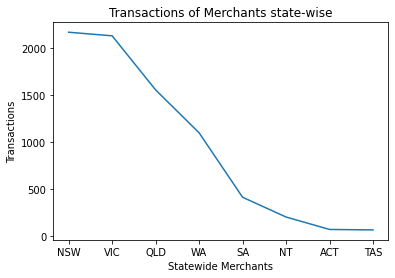

In [43]:
plt.xlabel("Statewide Merchants")
plt.ylabel("Transactions")
plt.title("Transactions of Merchants state-wise")
ds_state.plot()

___

# Transaction description of the state-wise merchants

In [44]:
ds_tax = ds["txn_description"].value_counts()
ds_tax

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Text(0.5, 1.0, 'Transactions description of the customers')

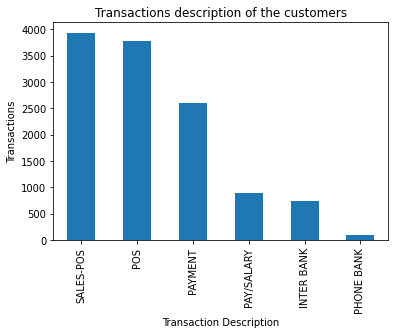

In [45]:
ds_tax.plot(kind="bar")
plt.xlabel("Transaction Description")
plt.ylabel("Transactions")
plt.title("Transactions description of the customers")

(0.0, 100.0)

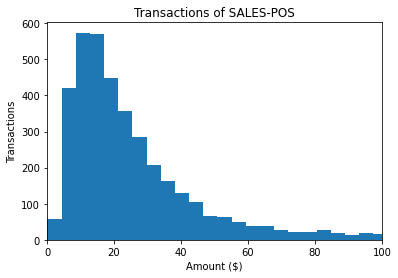

In [46]:
ds[ds["txn_description"]=='SALES-POS'].amount.plot.hist(bins=1000)
plt.title("Transactions of SALES-POS")
plt.ylabel("Transactions")
plt.xlabel("Amount ($)")
plt.xlim(0, 100)

(0.0, 100.0)

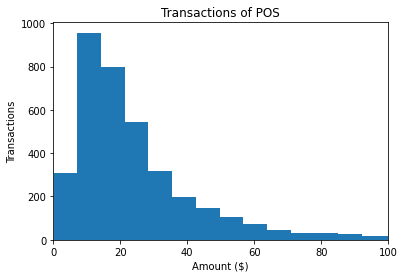

In [47]:
ds[ds["txn_description"]=='POS'].amount.plot.hist(bins=1000)
plt.title("Transactions of POS")
plt.ylabel("Transactions")
plt.xlabel("Amount ($)")
plt.xlim(0, 100)

(0.0, 100.0)

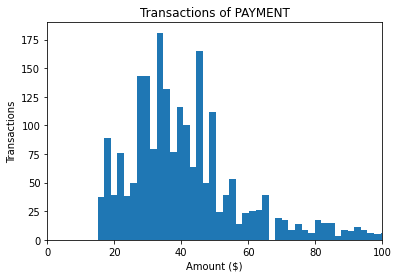

In [48]:
ds[ds["txn_description"]=='PAYMENT'].amount.plot.hist(bins=1000)
plt.title("Transactions of PAYMENT")
plt.ylabel("Transactions")
plt.xlabel("Amount ($)")
plt.xlim(0, 100)

(0.0, 1000.0)

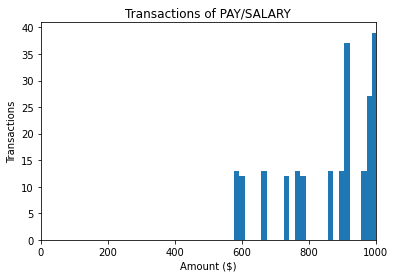

In [49]:
ds[ds["txn_description"]=='PAY/SALARY'].amount.plot.hist(bins=500)
plt.title("Transactions of PAY/SALARY")
plt.ylabel("Transactions")
plt.xlabel("Amount ($)")
plt.xlim(0, 1000)

(0.0, 100.0)

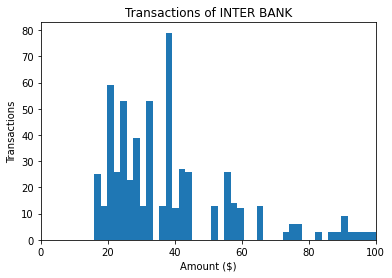

In [50]:
ds[ds["txn_description"]=='INTER BANK'].amount.plot.hist(bins=1000)
plt.title("Transactions of INTER BANK")
plt.ylabel("Transactions")
plt.xlabel("Amount ($)")
plt.xlim(0, 100)

(0.0, 100.0)

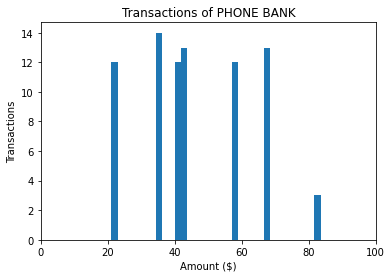

In [51]:
ds[ds["txn_description"]=='PHONE BANK'].amount.plot.hist(bins=1000)
plt.title("Transactions of PHONE BANK")
plt.ylabel("Transactions")
plt.xlabel("Amount ($)")
plt.xlim(0, 100)

___

# Top 5 customers of ANZ 

In [52]:
ds_top_name=ds["first_name"].value_counts().nlargest(5)
ds_top_name

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64

Text(0, 0.5, 'Transactions')

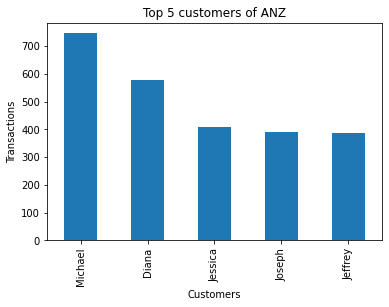

In [53]:
ds_top_name.plot(kind = "bar")
plt.title("Top 5 customers of ANZ")
plt.xlabel("Customers")
plt.ylabel("Transactions")